In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [143]:
# pd.read_csv('Sales_data/Sales_April_2019.csv')

files = [file for file in os.listdir('Sales_data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('Sales_data/'+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv('all_data.csv',index=False)

In [144]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [145]:
all_months_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [146]:
all_months_data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [147]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [148]:
all_months_data.shape

(186850, 6)

In [149]:
all_months_data.isnull().sum(axis=1)

0        0
1        6
2        0
3        0
4        0
        ..
11681    0
11682    0
11683    0
11684    0
11685    0
Length: 186850, dtype: int64

<Axes: >

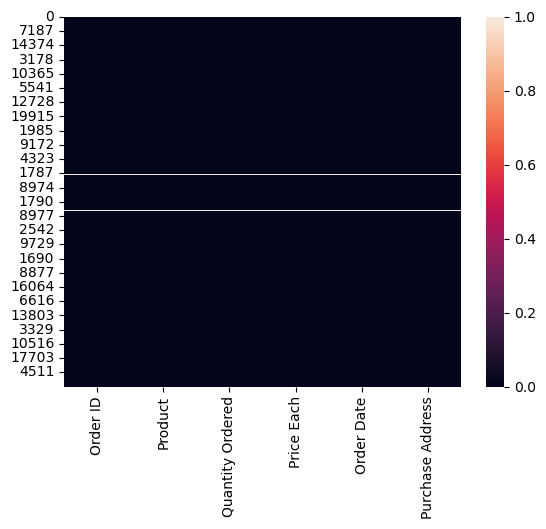

In [150]:
sns.heatmap(all_months_data.isnull())

In [151]:
df=all_months_data

In [152]:
df['month']=pd.to_datetime(df['Order Date'],errors='coerce').dt.month

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7200\1617879091.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month']=pd.to_datetime(df['Order Date'],errors='coerce').dt.month


In [153]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0


In [155]:
df.dropna(inplace=True)

### What was the best month for sales? How much was earned that month?

In [156]:
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])

In [157]:
df['Sales']=df['Price Each']*df['Quantity Ordered']

In [158]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'Sales'],
      dtype='object')

In [159]:
month_sales=df.groupby('month')['Sales'].sum().round(2).sort_values(ascending=False)

In [160]:
df.groupby('month')['Sales'].sum().round(2).sort_values(ascending=False).max()

4613443.34

<Axes: xlabel='month'>

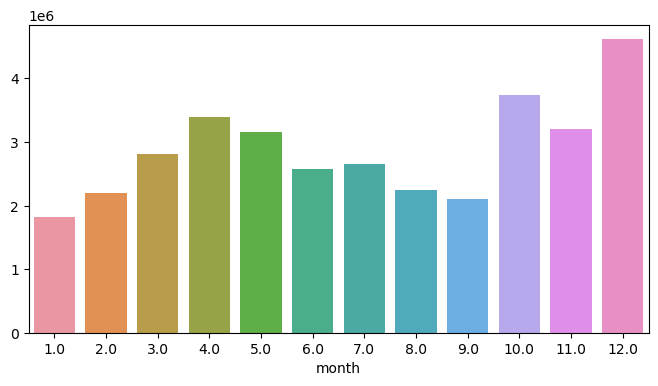

In [161]:
plt.figure(figsize=(8,4))
sns.barplot(x=month_sales.index,y=month_sales.values)

### What city sold the most product?

In [163]:
df.duplicated().any()

True

In [164]:
df=df.drop_duplicates()

In [173]:
df['split_address']=df['Purchase Address'].apply(lambda x:x.split(',')[1])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7200\3579597975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split_address']=df['Purchase Address'].apply(lambda x:x.split(',')[1])


In [174]:
df['split_address']

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
11681       Los Angeles
11682     San Francisco
11683     San Francisco
11684     San Francisco
11685     San Francisco
Name: split_address, Length: 185686, dtype: object

In [177]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.9,Dallas


In [176]:
df = df.rename(columns={'split_address': 'City'})

In [178]:
df['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [182]:
city_sales=df.groupby('City')['Sales'].sum().sort_values(ascending=False)

In [187]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False)

City
 San Francisco    8254743.55
 Los Angeles      5448304.28
 New York City    4661867.14
 Boston           3658627.65
 Atlanta          2794199.07
 Dallas           2765373.96
 Seattle          2745046.02
 Portland         2319331.94
 Austin           1818044.33
Name: Sales, dtype: float64

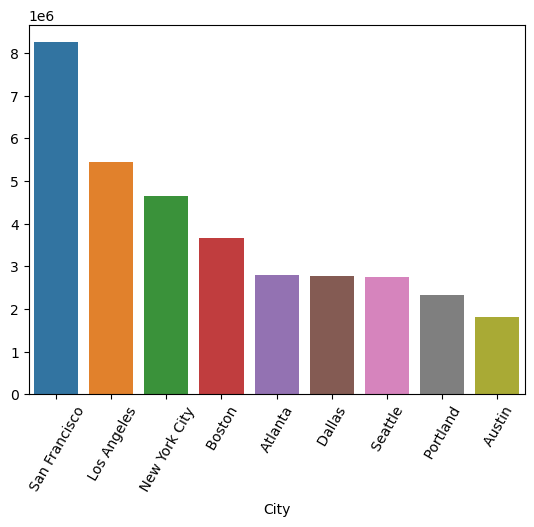

In [186]:
sns.barplot(x=city_sales.index,y=city_sales.values)
plt.xticks(rotation=60)
plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [191]:
df['hour']=pd.to_datetime(df['Order Date']).dt.hour

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7200\3475343074.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour']=pd.to_datetime(df['Order Date']).dt.hour


In [193]:
df['hour'].unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3])

In [196]:
hour_sales=df.groupby('hour')['Sales'].sum().sort_values(ascending=False)

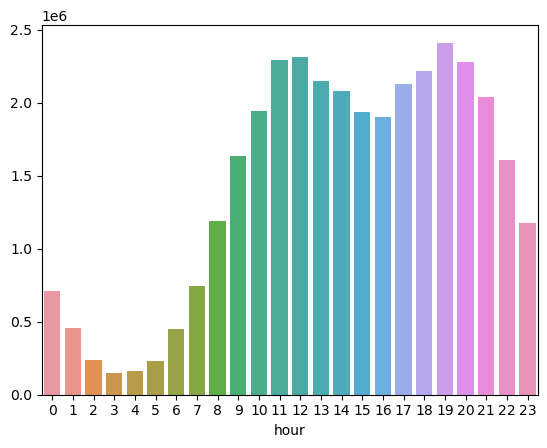

In [198]:
sns.barplot(x=hour_sales.index,y=hour_sales.values)
# plt.xticks(rotation=60)
plt.show()

### What products are most often sold together?

In [203]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.9,Dallas,8


In [219]:
duplicates=df[df['Order ID'].duplicated(keep=False)]

In [246]:
duplicates.head()

,Grouped Products,Order ID
3,"Google Phone,Wired Headphones",176560
18,"Google Phone,USB-C Charging Cable",176574
32,"AAA Batteries (4-pack),Google Phone",176586
119,"Lightning Charging Cable,USB-C Charging Cable",176672
129,"Apple Airpods Headphones,ThinkPad Laptop",176681


In [227]:
duplicates['Grouped Products']=duplicates.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7200\2524509923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Grouped Products']=duplicates.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [235]:
duplicates=duplicates[['Grouped Products','Order ID']].drop_duplicates()

In [240]:
duplicates['Grouped Products'].value_counts().sort_values(ascending=False)

Grouped Products
iPhone,Lightning Charging Cable             886
Google Phone,USB-C Charging Cable           857
iPhone,Wired Headphones                     361
Vareebadd Phone,USB-C Charging Cable        312
Google Phone,Wired Headphones               303
                                           ... 
Flatscreen TV,20in Monitor                    1
LG Dryer,AAA Batteries (4-pack)               1
iPhone,LG Washing Machine                     1
ThinkPad Laptop,LG Dryer                      1
LG Washing Machine,AA Batteries (4-pack)      1
Name: count, Length: 350, dtype: int64

### What product sold the most? Why do you think it sold the most?

In [272]:
product_quantity_ordered=df.groupby('Product').sum()['Quantity Ordered']
product_price_each=df.groupby('Product').sum()['Price Each']

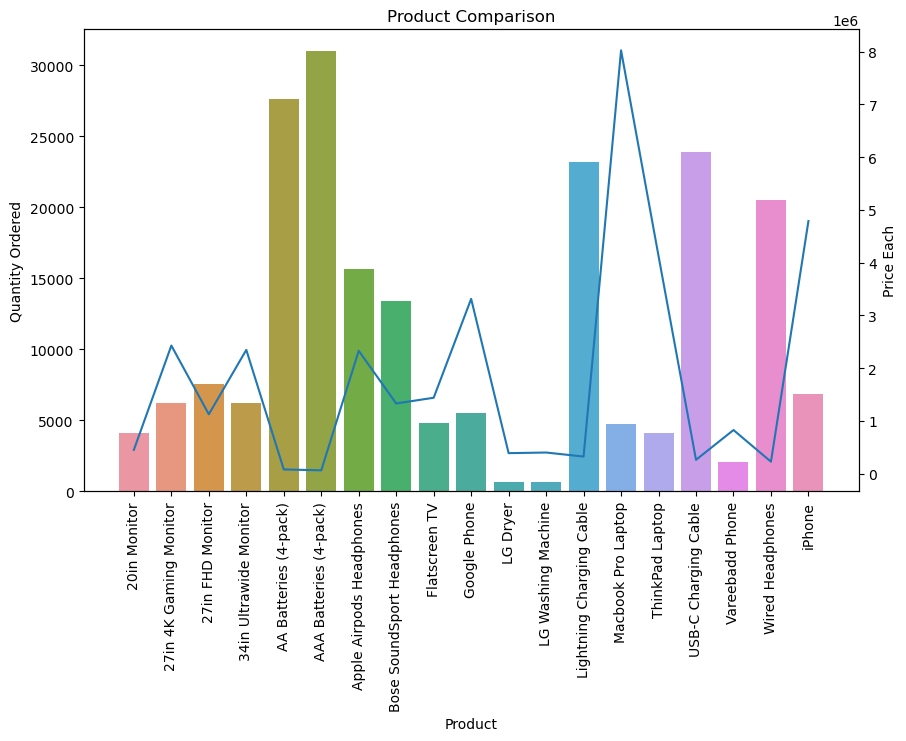

In [286]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.tick_params(axis='x', rotation=90)

sns.barplot(x=product_quantity_ordered.index,y=product_quantity_ordered.values,ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x=product_price_each.index,y=product_price_each.values,ax=ax2)

ax1.set_title('Product Comparison')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price Each')

plt.show()